<a href="https://colab.research.google.com/github/Gabriel-Machado-GM/Online-Judge-Solutions-Python/blob/main/uva_113_power_of_cryptography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UVA 113 Power of Cryptography

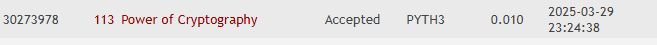

**@PDF: [UVA 113 - Power of Cryptography](https://onlinejudge.org/external/1/113.pdf)** \
**@AUTOR: [GABRIEL MACHADO](https://github.com/Gabriel-Machado-GM)** \
**@REPO: [ONLINE JUDGE SOLUTIONS PYTHON](https://github.com/Gabriel-Machado-GM/Online-Judge-Solutions-Python)**

Current work in cryptography involves (among other things) large prime numbers and computing powers of numbers modulo functions of these primes[cite: 1]. Work in this area has resulted in the practical use of results from number theory and other branches of mathematics once considered to be of only theoretical interest[cite: 2].

This problem involves the efficient computation of integer roots of numbers[cite: 3].

Given an integer $n \ge 1$ and an integer $p \ge 1$ you are to write a program that determines $\sqrt[n]{p},$ the positive n-th root of p[cite: 4]. In this problem, given such integers n and p, p will always be of the form $k^{n}$ for an integer k (this integer is what your program must find)[cite: 5].

## Input

The input consists of a sequence of integer pairs n and p with each integer on a line by itself[cite: 6]. For all such pairs $1 \le n \le 200$, $1 \le p < 10^{101}$ and there exists an integer k, $1 \le k \le 10^{9}$ such that $k^{n} = p$[cite: 7].

## Output

For each integer pair n and p the value $\sqrt[n]{p}$ should be printed, i.e., the number k such that $k^{n} = p$.

## Sample Input

2\
16\
3\
27\
7\
4357186184021382204544


## Sample Output

4\
3\
1234

In [ ]:
import sys
import math

# Problem: UVA 113 - Power of Cryptography
# Find integer k such that k^n = p, given integers n and p.
# Constraints: 1 <= n <= 200, 1 <= p < 10^101.
# Guarantee: p is always k^n for some integer k, where 1 <= k <= 10^9.

# Input Reading: Process pairs of n and p until End-of-File (EOF).
# This loop structure is standard for competitive programming problems
# where the number of test cases is not explicitly given.
while True:
    try:
        # Read n: the degree of the root.
        # Data Type: Standard integer. Fits within basic integer types.
        n_str = sys.stdin.readline()
        # Check for EOF: If readline() returns an empty string, we've reached the end.
        if not n_str:
            break
        n = int(n_str.strip()) # strip() removes potential trailing newline

        # Read p: the number whose n-th root is required.
        # Data Type: Arbitrary-Precision Integer. Python's `int` automatically handles
        # the large values of p (up to 10^101) without overflow. This is a key
        # feature for problems involving large number arithmetic.
        p_str = sys.stdin.readline()
        if not p_str: # Should ideally not happen if input is paired correctly
             break
        p = int(p_str.strip())

        # --- Core Algorithm: Finding the n-th root ---
        #
        # Approach: Use floating-point exponentiation.
        # We need to compute k = p^(1/n).
        #
        # Mathematical Background: The n-th root of p is p raised to the power of (1/n).
        #
        # Implementation Choice: Python's `**` operator or `pow()` function can compute
        # powers with floating-point exponents. We use `1.0/n` to ensure floating-point
        # division, resulting in a floating-point exponent.
        #
        # Data Structures Used:
        #   - `p`: Python `int` (arbitrary precision)
        #   - `n`: Python `int` (standard precision)
        #   - `1.0/n`: Python `float`
        #   - `k_float`: Python `float` (standard IEEE 754 double precision)
        #
        # Precision Considerations:
        # Calculating p^(1/n) with floating-point numbers can introduce small precision
        # errors, especially for very large numbers `p`. However, the problem statement
        # *guarantees* that `p` is a perfect n-th power of an *integer* `k`. This crucial
        # guarantee implies that the result of the floating-point calculation `p**(1.0/n)`
        # will be extremely close to the true integer value `k`.
        #
        # Example: If k=1234, n=7, p = 1234^7 = 4357186184021382204544.
        # p**(1.0/7) might yield something like 1234.0000000000002 or 1233.9999999999998.
        k_float = p**(1.0/n)

        # Algorithm Step: Rounding to find the integer root.
        # Since `k_float` is expected to be very close to the integer `k`,
        # rounding `k_float` to the nearest integer should recover the exact value of `k`.
        # The `round()` function performs this rounding.
        #
        # Alternative Algorithm Considered: Binary Search
        #   - Search Space: The value `k` lies between 1 and 10^9.
        #   - Method: Perform binary search on the range [1, 10^9]. For a middle value `mid`,
        #     calculate `mid^n` using Python's `pow(mid, n)` (which efficiently handles
        #     large integer exponentiation).
        #   - Comparison:
        #     - If `mid^n == p`, `mid` is the answer.
        #     - If `mid^n < p`, search in the upper half `[mid+1, high]`.
        #     - If `mid^n > p`, search in the lower half `[low, mid-1]`.
        #   - Complexity: O(log(max_k) * log(n)) for exponentiation by squaring.
        #   - Trade-offs: Binary search avoids floating-point precision issues entirely
        #     but is more complex to implement than the direct floating-point calculation.
        #     Given the problem guarantee, the simpler floating-point approach is sufficient and often faster.
        k = round(k_float)

        # Output: Print the calculated integer root k.
        # The output format requires printing only the integer k for each input pair (n, p).
        print(k)

    except EOFError:
        # This exception is caught when `sys.stdin.readline()` reaches the end of the input.
        break # Exit the loop gracefully.
    except Exception as e:
        # Catch any other unexpected errors during input processing or calculation.
        # This could include errors like non-integer input if the input format is violated.
        # print(f"An error occurred: {e}", file=sys.stderr) # Uncomment for debugging
        break # Stop processing if an error occurs.